In [1]:
from hypyflow import blocks, PreprocessingPipeline
from scipy.io import loadmat
import numpy as np
import os

os.chdir("/home/arturo.samayor/Practicas/hyperspectralpreprocessor-main")
number = 1111
cube_path = f"/home/arturo.samayor/Practicas/HeiPorSPECTRAL_example/intermediates/preprocessing/L1/P086#2021_04_15_09_22_02.blosc"
#cube_path = f"/home/arturo.samayor/Practicas/HS-Images/Headwall/ID_183_CN_1_Headwall Linescan/LINEimagesID000183C01_cropped_Pre-processed.mat"
#cube = loadmat(cube_path)["CI_cube"]
#cube = np.load(f"/home/arturo.samayor/Practicas/HS_Images/Datos_Arturo/data/mano_lejos{number}_cube.npy")

#cube = np.load(cube_path.read_cube())

#cube=np.clip(cube,0,1)

                     _____                                                                    _____ 
                    ( ___ )------------------------------------------------------------------( ___ )
                     |   |                                                                    |   | 
                     |   |  ██░ ██▓██   ██▓ ██▓███ ▓██   ██▓  █████▒██▓     ▒█████   █     █░ |   | 
                     |   | ▓██░ ██▒▒██  ██▒▓██░  ██▒▒██  ██▒▓██   ▒▓██▒    ▒██▒  ██▒▓█░ █ ░█░ |   | 
                     |   | ▒██▀▀██░ ▒██ ██░▓██░ ██▓▒ ▒██ ██░▒████ ░▒██░    ▒██░  ██▒▒█░ █ ░█  |   | 
                     |   | ░▓█ ░██  ░ ▐██▓░▒██▄█▓▒ ▒ ░ ▐██▓░░▓█▒  ░▒██░    ▒██   ██░░█░ █ ░█  |   | 
                     |   | ░▓█▒░██▓ ░ ██▒▓░▒██▒ ░  ░ ░ ██▒▓░░▒█░   ░██████▒░ ████▓▒░░░██▒██▓  |   | 
                     |   |  ▒ ░░▒░▒  ██▒▒▒ ▒▓▒░ ░  ░  ██▒▒▒  ▒ ░   ░ ▒░▓  ░░ ▒░▒░▒░ ░ ▓░▒ ▒   |   | 
                     |   |  ▒ ░▒░ ░▓██ ░▒░ ░▒ ░     ▓██ ░▒░  ░     ░ ░ ▒  ░  ░ ▒ ▒░   ▒ ░ ░

In [2]:
import os

# Configurar la variable de entorno
os.environ["PATH_Tivita_HeiPorSPECTRAL"] = "/home/arturo.samayor/Practicas/HeiPorSPECTRAL_example"

# Verificar que está configurada correctamente
print(os.environ.get("PATH_Tivita_HeiPorSPECTRAL"))


/home/arturo.samayor/Practicas/HeiPorSPECTRAL_example


In [3]:
from htc import DataPath, LabelMapping

# You can load every image based on its unique name
path = DataPath.from_image_name('P086#2021_04_15_09_22_02')
#obj = DataPath(image_dir = None, data_dir="/home/arturo.samayor/Practicas/HeiPorSPECTRAL_example")
#path = obj.from_image_name('P086#2021_04_15_09_22_02')

# HSI cube format: (height, width, channels)
print(path.read_cube().shape)
cube = path.read_cube()

(480, 640, 100)


COSAS DE ALEJANDRO

In [4]:
'''# First let's visualize the information!
from hypyflow import HyperspectralViewer, constants

wavelenghts=constants.HEADWALL_VNIR_WAVELENGHTS
# Create and run the viewer
viewer = HyperspectralViewer(cube, wavelenghts)
viewer.run()'''

"# First let's visualize the information!\nfrom hypyflow import HyperspectralViewer, constants\n\nwavelenghts=constants.HEADWALL_VNIR_WAVELENGHTS\n# Create and run the viewer\nviewer = HyperspectralViewer(cube, wavelenghts)\nviewer.run()"

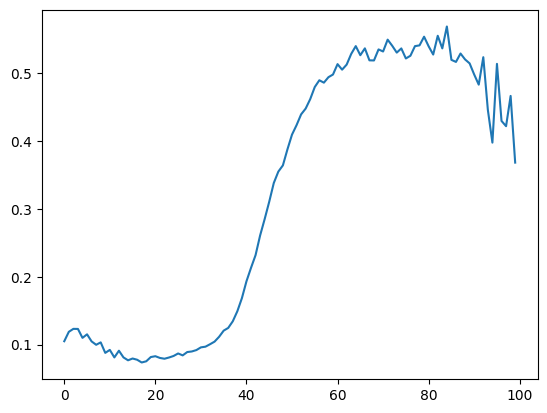

In [5]:
import matplotlib.pyplot as plt
plt.plot(cube[100,100,:])
plt.show()

 - Using previous mask, skipping masking blocks


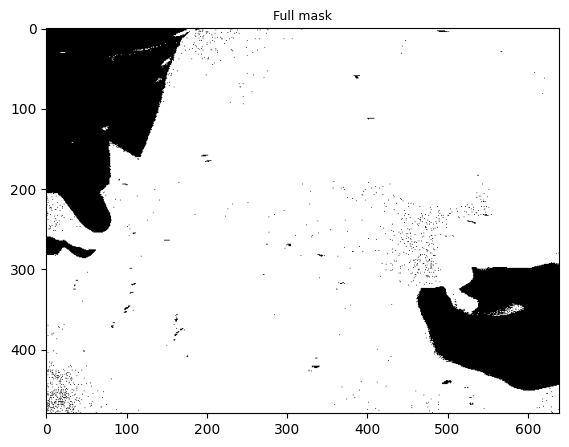

In [6]:
# hago que la variable cube, en lugar de la tercera dimension tener 369 dimensiones, tenga desde la 100 hasta la 369
#cube = cube[:,:,100:369]


preprocesschain = [
    blocks.MaskNegativeValues(),
    blocks.MaskZeroValues(),
    blocks.MaskSaturatedValues(99.99), #
    #blocks.ProcessNormalize(type="MinMax"),#
    #blocks.ProcessDenoise(),
    blocks.MaskRxAnomalyDetection(0.2), #
    #blocks.MaskTargetSignature(interactive=True,select_area=True,method="SID"), #TODO: hacer que la barra selectora sea logarítmica, para que cuando me acerque a 0.1 no sea tan dificil seleccionar
    blocks.MaskTargetSignature(interactive=True,select_area=True,method="SAM"),
    blocks.ProcessSmoothSpectral("gaussian",  {"sigma": 1}),#(method="moving_average", params={"window_size": 3}),
    #blocks.ProcessSmoothSpatial(),
    blocks.MaskZeroValues(),
    blocks.MaskNegativeValues()
]

try:
    if os.path.exists(f"/home/arturo.samayor/Practicas/data/masks_{number}head.npy"):# and "headwall" in cube_path.lower():
        full_mask = np.load(f"/home/arturo.samayor/Practicas/data/masks_{number}head.npy")
    elif os.path.exists(f"/home/arturo.samayor/Practicas/data/masks_{number}.npy") and "snapshot" in cube_path.lower():
        full_mask = np.load(f"/home/arturo.samayor/Practicas/data/masks_{number}.npy")
    else: full_mask = None
    masks = None
except:
    full_mask = None
    masks = None
pre = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = pre(preprocesschain, verbose=False, plot_masks=True, mask=full_mask) # donde full_mask es la mascara final

np.save(f"/home/arturo.samayor/Practicas/data/masks_{number}head.npy", full_mask)

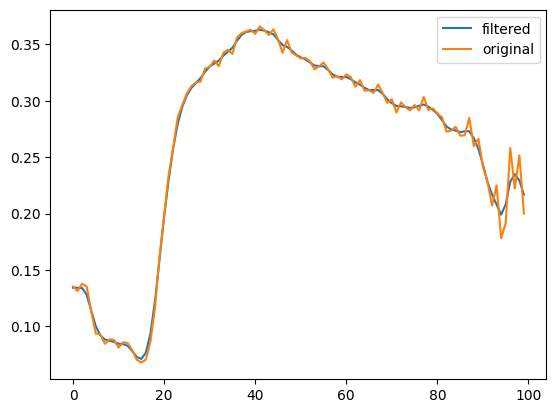

In [7]:
plt.plot(filtered_data[300,300,:], label = "filtered")
plt.plot(cube[300,300,:], label="original")
plt.legend()
plt.show()

COSAS ALEJANDRO

In [8]:
'''import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from hypyflow import constants

def second_derivative_spectral(cube):
    # Compute the first derivative along the spectral axis (axis=2)
    first_derivative = np.diff(cube, n=1, axis=2)
    
    # Compute the second derivative along the spectral axis (axis=2)
    second_derivative = np.diff(first_derivative, n=1, axis=2)
    
    # Optional: Pad the second derivative to match the original cube's shape
    # Pad one element along the spectral axis to keep the original shape (e.g., using 'edge' padding)
    padded_second_derivative = np.pad(second_derivative, ((0, 0), (0, 0), (1, 0)), mode='edge')
    
    return padded_second_derivative

def smooth_cube_gaussian(cube, sigma=1):
    """
    Apply Gaussian smoothing along the spectral axis (axis=2) of the hyperspectral cube.
    
    Parameters:
    - cube: 3D numpy array (hyperspectral cube)
    - sigma: Standard deviation for the Gaussian kernel
    
    Returns:
    - smoothed_cube: Smoothed hyperspectral cube
    """
    # Apply Gaussian filter along the spectral axis (axis=2)
    smoothed_cube = gaussian_filter1d(cube, sigma=sigma, axis=2)
    
    return smoothed_cube


def smooth_cube_moving_average(cube, window_size=5):
    """
    Apply moving average smoothing along the spectral axis (axis=2) of the hyperspectral cube.
    
    Parameters:
    - cube: 3D numpy array (hyperspectral cube)
    - window_size: Size of the moving average window
    
    Returns:
    - smoothed_cube: Smoothed hyperspectral cube
    """
    def moving_average(arr, window_size):
        # Apply 1D convolution for moving average
        return np.convolve(arr, np.ones(window_size)/window_size, mode='same')
    
    # Apply moving average along the spectral axis (axis=2) for each pixel
    smoothed_cube = np.apply_along_axis(moving_average, axis=2, arr=cube, window_size=window_size)
    
    return smoothed_cube

# ------------------- ARTURO
wavelenghts = "/home/arturo.samayor/Practicas/hb_sign_reduced.txt"
wavelenghts = np.loadtxt(wavelenghts, usecols=0)
# ------------------- ARTURO

#normalize the cube
cube = cube - np.min(cube) + 1e-6
cube = cube / np.max(cube)

cube_absorbance = np.log(1/cube)

smoothed_cube = smooth_cube_gaussian(cube_absorbance, sigma=3.2)
# smoothed_cube = smooth_cube_moving_average(cube, window_size = 5)
cube_2d = second_derivative_spectral(smoothed_cube)


#wavelenghts = constants.HEADWALL_VNIR_WAVELENGHTS
idx = list(range(cube.shape[2]))


def closest_index(arr, target):
    arr = np.array(arr)
    #print(np.argmin(np.abs(arr - target)))
    return np.argmin(np.abs(arr - target))

#print(constants.HEADWALL_VNIR_WAVELENGHTS)
window_1_ox = cube_2d[:, :, closest_index(wavelenghts, 570) : closest_index(wavelenghts, 590)]
window_2_ox = cube_2d[:, :, closest_index(wavelenghts, 740) : closest_index(wavelenghts, 780)]

window_1_per = cube_2d[:, :, closest_index(wavelenghts, 655) : closest_index(wavelenghts, 735)]
window_2_per = cube_2d[:, :, closest_index(wavelenghts, 825) : closest_index(wavelenghts, 925)]

window_1_thi = cube_2d[:, :, closest_index(wavelenghts, 530) : closest_index(wavelenghts, 590)]
window_2_thi = cube_2d[:, :, closest_index(wavelenghts, 785) : closest_index(wavelenghts, 825)]

window_1_twi = cube_2d[:, :, closest_index(wavelenghts, 880) : closest_index(wavelenghts, 900)]
window_2_twi = cube_2d[:, :, closest_index(wavelenghts, 955) : closest_index(wavelenghts, 980)]

# ARTURO
print("Índices de las ventanas:")
print("Oxigenación:", closest_index(wavelenghts, 570), closest_index(wavelenghts, 590), closest_index(wavelenghts, 740), closest_index(wavelenghts, 780))
print("Rango de longitudes de onda:", np.min(wavelenghts), np.max(wavelenghts))
print("Shape de window_1_ox:", window_1_ox.shape)
print("Shape de window_2_ox:", window_2_ox.shape)
if window_1_ox.size == 0 or window_2_ox.size == 0:
    print("Error: Una de las ventanas está vacía.")
    exit()

# ARTURO

r1 = 1.0
r2 = 1.0

s1 = 0.0
s2 = 1.01

oxigenation_cube = (np.min(window_1_ox, axis=2) / r1) / (np.min(window_1_ox, axis=2) / r1 + np.min(window_2_ox, axis=2) / r2)
NIR_perfusion_index = (np.mean(window_2_per, axis=2) / np.mean(window_1_per, axis=2) - s1) #/ (s2 - s1)
THI = (np.mean(window_2_thi, axis=2) / np.mean(window_1_thi, axis=2)-s1)#/(s2-s1)  # Tissue Hemoglobin index
TWI = (np.mean(window_2_twi, axis=2) / np.mean(window_1_twi, axis=2)-s1)#/(s2-s1)  # Tissue Water index



plt.imshow(oxigenation_cube, cmap='hot')
plt.colorbar()
plt.title("Oxigenation")
plt.show()

plt.imshow(NIR_perfusion_index, cmap='hot')
plt.colorbar()
plt.title("NIR Perfusion index")
plt.show()


plt.imshow(THI, cmap='hot')
plt.colorbar()
plt.title("THI")
plt.show()

plt.imshow(TWI, cmap='hot')
plt.colorbar()
plt.title("TWI")
plt.show()'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.ndimage import gaussian_filter1d\nfrom hypyflow import constants\n\ndef second_derivative_spectral(cube):\n    # Compute the first derivative along the spectral axis (axis=2)\n    first_derivative = np.diff(cube, n=1, axis=2)\n    \n    # Compute the second derivative along the spectral axis (axis=2)\n    second_derivative = np.diff(first_derivative, n=1, axis=2)\n    \n    # Optional: Pad the second derivative to match the original cube\'s shape\n    # Pad one element along the spectral axis to keep the original shape (e.g., using \'edge\' padding)\n    padded_second_derivative = np.pad(second_derivative, ((0, 0), (0, 0), (1, 0)), mode=\'edge\')\n    \n    return padded_second_derivative\n\ndef smooth_cube_gaussian(cube, sigma=1):\n    """\n    Apply Gaussian smoothing along the spectral axis (axis=2) of the hyperspectral cube.\n    \n    Parameters:\n    - cube: 3D numpy array (hyperspectral cube)\n    - sigma: Standard

## Máscara antes de transformación a Absorbancia

media de hb_sign: 0.11679111930131943
media de hbO2_sign: 0.20195075346806585
Formas - hb_sign: (80,) hbO2_sign: (80,) filtered_data: (480, 640, 80)
El valor máximo del cubo (absorbancia) es: 5.092916965484619 y el valor mínimo es: -0.2441544383764267
El valor máximo del cubo enmascarado es: 2.3445937633514404 y el valor mínimo es: -0.3689972758293152


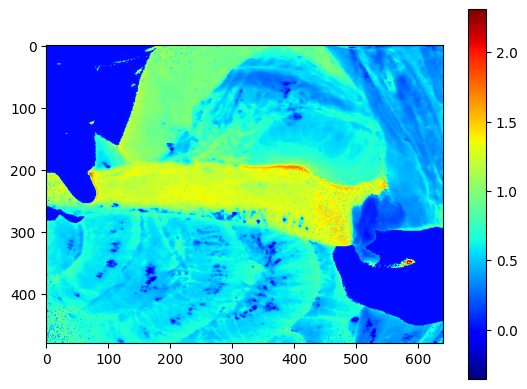

  0%|          | 0/480 [00:00<?, ?it/s]

Hb min/max: 0.0 0.9999999999999999
HbO2 min/max: 0.0 0.9999999999999999
media de ab_hb: 0.40935933355073206
media de ab_hbo2: 0.784413733250489


In [110]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm.auto import tqdm, trange

# ============================================================== #
# [+] Funciones auxiliares
# ============================================================== #

def from_reflectance_to_absorbance(data_reflectance):
    epsilon = 1e-10  # Un valor pequeño para evitar el logaritmo de cero
    reflectance = np.clip(data_reflectance, epsilon, np.max(data_reflectance))  # Recorta los valores entre epsilon y 1
    absorbance = -np.log10(reflectance)
    return absorbance

# Método de aplicación de la máscara
def apply_mask(data, mask):
    masked_data = np.zeros_like(data)
    for i in range(data.shape[2]):
        masked_data[:, :, i] = np.where(mask, data[:, :, i], 0)
    return masked_data

# en este método, a todos los valores se le sumará el valor absoluto del valor mínimo
# para que todos los valores sean positivos
def always_positive(data):
    return data + np.abs(np.min(data))

# ============================================================== #

# ============================================================== #
# [+] Carga de las signaturas de los compuestos y normalización
# ============================================================== #

hb_sign = np.loadtxt("/home/arturo.samayor/Practicas/hb_sign_reduced.txt")[:, 1]
hbO2_sign = np.loadtxt("/home/arturo.samayor/Practicas/hbo2_sign_reduced.txt")[:, 1]


hb_sign = (hb_sign - np.min(hb_sign)) / (np.max(hb_sign) - np.min(hb_sign))
hbO2_sign = (hbO2_sign - np.min(hbO2_sign)) / (np.max(hbO2_sign) - np.min(hbO2_sign))
print(f"media de hb_sign: {np.mean(hb_sign)}")
print(f"media de hbO2_sign: {np.mean(hbO2_sign)}")
# ============================================================== #

# ============================================================== #
# [+] Cálculo de las abundancias y aplicación de la máscara
# ============================================================== #
filtered_data_absorbance = from_reflectance_to_absorbance(filtered_data)#filtered_data  # CUBO DE HEIPORSPECTRAL ESTÁ MEDIDO EN ABSORBANCIA
masked_cube = apply_mask(filtered_data_absorbance, full_mask)



#masked_cube = always_positive(masked_cube)
# ============================================================== #

# ============================================================== #
# [+] Caso en el que queramos reducir la cantidad de datos
# ============================================================== #
masked_cube = masked_cube[:,:,20:]
new_masked_cube = masked_cube#- np.min(masked_cube)) / (np.max(masked_cube) - np.min(masked_cube))# LO ULTIMO QUE HAGO
hb_sign_new = hb_sign
hbO2_sign_new = hbO2_sign
# ============================================================== #

# ============================================================== #
# [+] Visualización de forma de los datos
# ============================================================== #
height, width, bands = masked_cube.shape
print("Formas - hb_sign:", hb_sign.shape, "hbO2_sign:", hbO2_sign.shape, "filtered_data:", masked_cube.shape)
print(f"El valor máximo del cubo (absorbancia) es: {np.max(cube)} y el valor mínimo es: {np.min(cube)}")
print(f"El valor máximo del cubo enmascarado es: {np.max(masked_cube)} y el valor mínimo es: {np.min(masked_cube)}")
plt.imshow(masked_cube[:, :, 0], cmap="jet")
plt.colorbar()
plt.show()
# ============================================================== #

# ============================================================== #
# [+] Inicialización de las matrices de abundancias
# ============================================================== #
ab_hb = np.zeros((height, width))
ab_hbo2 = np.zeros((height, width))
# ============================================================== #

# ============================================================== #
# [+] Función de residuos y optimización de las abundancias
# ============================================================== #
def residuals(x, pixel, hb_sign, hbo2_sign):
    ab_hb, ab_hbo2 = x  # x es un vector con dos elementos: ab_hb y ab_hbo2
    model = ab_hb * hb_sign + ab_hbo2 * hbo2_sign  # Modelo lineal de absorbancia
    #return (pixel - model)**2  # Residuos: diferencia entre lo observado y lo modelado
    return RMSE(pixel, model)

def RMSE(y1, y2):
    return np.sqrt(np.mean((y1 - y2) ** 2))

def residuals_with_regularization(x, pixel, hb_sign, hbO2_sign, lambda_reg=0.7):
    ab_hb, ab_hbo2 = x
    model = ab_hb * hb_sign + ab_hbo2 * hbO2_sign
    residual = pixel - model
    # Penalización L1 para fomentar la esparsidad
    penalty = lambda_reg * (ab_hb + ab_hbo2)
    return np.concatenate((residual, [penalty]))



# Aplicar least_squares
def process_pixel(i, j):
    pixel = new_masked_cube[i, j, :]  # Datos de absorbancia del píxel
    
    # Si el píxel es 0 por la máscara, no calcula nada
    if pixel.sum() == 0:
        return i, j, [0, 0]
    
    initial_guess = [0.01, 0.01]  # Un punto de partida para ab_hb y ab_hbo2
    
    # Ejecutar least_squares
    result = least_squares(
        residuals, 
        initial_guess, 
        args=(pixel, hb_sign_new, hbO2_sign_new), 
        bounds=([0, 0], [1, 1]),
        x_scale='jac',
        loss='soft_l1'
    )
    return i, j, result.x

results = Parallel(n_jobs=40)(
    delayed(process_pixel)(i, j) for i in trange(height) for j in range(width)
)

for i, j, abundances in results:
    ab_hb[i, j], ab_hbo2[i, j] = abundances

# Mostrar los valores mínimos y máximos de cada matriz de abundancias
print("Hb min/max:", np.min(ab_hb), np.max(ab_hb))
print("HbO2 min/max:", np.min(ab_hbo2), np.max(ab_hbo2))
print(f"media de ab_hb: {np.mean(ab_hb)}")
print(f"media de ab_hbo2: {np.mean(ab_hbo2)}")


## Mostrar niveles de Hb y HbO2

Abundancia Hb: min: 0.0 max: 0.9999999999999999
Abundancia HbO2: min: 0.0 max: 0.9999999999999999


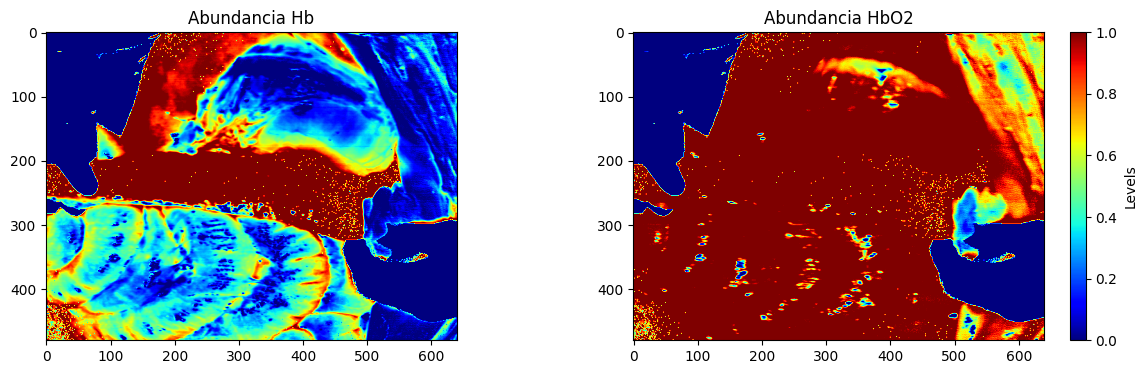

'plt.imshow(ab_bg[0]/ab_bg[0].max(), cmap="jet", vmin=0)\nplt.title("Abundancia Background")\nplt.show()'

In [111]:
# Visualizamos las abundancias
# muestro los máximos y mínimos de cada matriz
print("Abundancia Hb: min:", np.min(ab_hb), "max:", np.max(ab_hb))
print("Abundancia HbO2: min:", np.min(ab_hbo2), "max:", np.max(ab_hbo2))
'''print("Abundancia Background: min:", np.min(ab_hbo2), "max:", np.min(ab_hbo2))'''



if (ab_hb.max() > ab_hbo2.max()):
    abmax = ab_hb.max()
else: abmax = ab_hbo2.max()
    

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(ab_hb/np.max(ab_hb), cmap="jet", vmin=0)
plt.title("Abundancia Hb")
plt.subplot(122)
plt.imshow(ab_hbo2/np.max(ab_hbo2), cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("Abundancia HbO2")
plt.show()

# muestro la imagen de ab_background,
'''plt.imshow(ab_bg[0]/ab_bg[0].max(), cmap="jet", vmin=0)
plt.title("Abundancia Background")
plt.show()'''





## Mostrar niveles de StO2

media de ab_hb: 0.40935933355073206
media de ab_hbo2: 0.784413733250489
STO2: min: 0.0 max: 0.9999999999
(480, 640)
Error: 0.18175151441368412


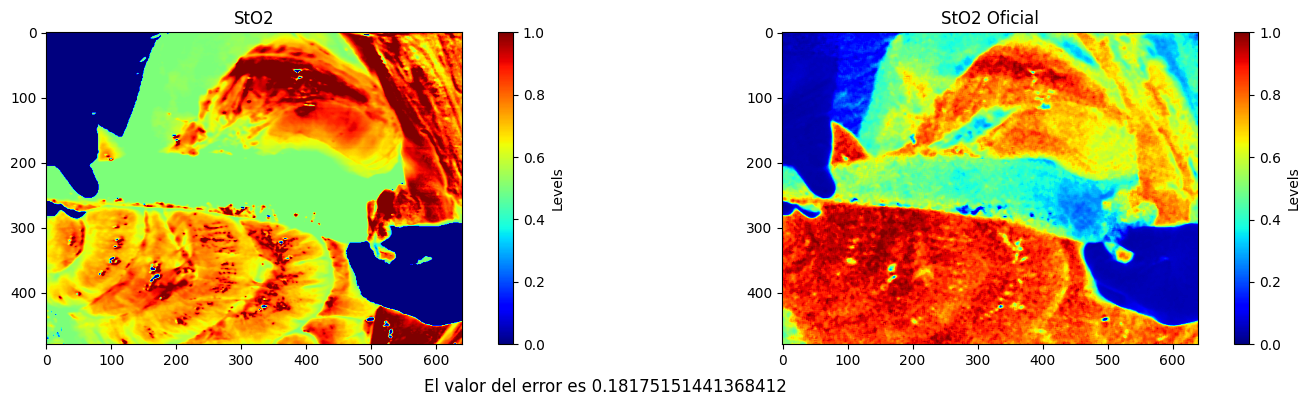

In [112]:
from scipy import ndimage

print(f"media de ab_hb: {np.mean(ab_hb)}")
print(f"media de ab_hbo2: {np.mean(ab_hbo2)}")

epsilon = 1e-10  # Un valor pequeño para evitar el logaritmo de cero
# sto2 = (hbo2)/(hb + hbo2) * 100
sto2 = ((ab_hbo2) / (ab_hb + ab_hbo2+epsilon))

sto2 = ndimage.median_filter(sto2, size=3)

sto2 = np.nan_to_num(sto2, nan=0, posinf=0, neginf=0)

# mostramos los máximos y mínimos de la matriz de sto2
print("STO2: min:", sto2.min(), "max:", sto2.max())

# Visualizamos el STO2
'''print(sto2.shape)
plt.figure(figsize=(5, 5))
plt.imshow(sto2, cmap="jet", vmin=0.38, vmax=0.8)
plt.colorbar(label="STO2 Levels")
plt.title("STO2")
plt.show()'''

import numpy as np
def mse(img1, img2):
    # cuanto menor sea el valor, más se parecen entre sí las imagenes
    err = np.sum((img1.astype("float") - img2.astype("float")) ** 2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

def RMSE(img1, img2):
    # cuanto menor sea el valor, más se parecen entre sí las imagenes
    err = mse(img1, img2)
    return np.sqrt(err)


path = DataPath.from_image_name('P086#2021_04_15_09_22_02')
s_to2 = path.compute_sto2()
s_to2 = np.where(s_to2 == "--", 0, s_to2)

# muestro el shape de la imagen de sto2 y los valores de la primera fila de la imagen
print(s_to2.shape)

error = RMSE(sto2, s_to2)
print("Error:", error)

'''plt.figure(figsize=(5, 5))
plt.imshow(s_to2, cmap="jet", vmin=0, vmax=1)
plt.colorbar(label="STO2 Levels")
plt.title("STO2")
plt.show()
'''


plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(sto2, cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("StO2")
plt.subplot(122)
plt.imshow(s_to2, cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("StO2 Oficial")
plt.figtext(0.5, 0.02, f'El valor del error es {error}', ha='center', va='center', fontsize=12, color='black')



# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [113]:
import numpy as np

############## ARTURO ####################
def apply_mask_2d(img, mask):
    masked_data = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            masked_data[i, j] = np.where(mask[i, j], img[i, j], np.nan)
    return masked_data

def mse(img1, img2):
    # Convertir a tipo float
    arr1 = img1.astype(float)
    arr2 = img2.astype(float)
    
    # Crear máscara para ignorar NaN
    mask = ~np.isnan(arr1) & ~np.isnan(arr2)
    
    # Si no hay píxeles válidos, devolver NaN
    if not np.any(mask):
        return np.nan
    
    # Calcular el MSE sólo en los píxeles válidos
    err = np.sum((arr1[mask] - arr2[mask]) ** 2)
    err /= float(np.count_nonzero(mask))  # Normalizar por el número de píxeles válidos
    
    return err

def RMSE(img1, img2):
    # Cálculo del RMSE usando la función mse modificada
    err = mse(img1, img2)
    if np.isnan(err):
        return np.nan
    
    return np.sqrt(err)

def calculate_psnr(img1, img2, max_value=1):
    # Convertir las imágenes a float32
    arr1 = np.array(img1, dtype=np.float32)
    arr2 = np.array(img2, dtype=np.float32)
    
    # Crear una máscara que ignore los NaN
    # Esta máscara será True sólo donde no hay NaN en ninguna de las dos imágenes
    mask = ~np.isnan(arr1) & ~np.isnan(arr2)
    
    # Si no hay elementos válidos, no se puede calcular el PSNR
    if not np.any(mask):
        return float('nan')
    
    # Calcular el MSE sólo en los píxeles válidos
    mse = np.mean((arr1[mask] - arr2[mask]) ** 2)
    
    # Si el MSE es cero, significa que las imágenes son idénticas en la región válida
    if mse == 0:
        return 100.0
    
    # Calcular el PSNR
    psnr = 20 * np.log10(max_value / np.sqrt(mse))
    return psnr

############## ARTURO ####################


# Ejemplo de uso:
#sto2 = np.array([[0, 0.5, 0.6], [0.3, 0, 0.4], [0.2, 0.1, 0]])  # Ejemplo de imagen 1
#s_to2 = np.array([[0, 0.4, 0.7], [0.2, 0, 0.5], [0.3, 0.1, 0]])  # Ejemplo de imagen 2

# Calcular el RMSE ignorando píxeles con valor 0
#################### ARTURO ####################
sto2ar = apply_mask_2d(sto2, full_mask)
s_to2ar = apply_mask_2d(s_to2, full_mask)
errorAr = RMSE(sto2ar, s_to2ar)
errorPSNRar = calculate_psnr(sto2ar, s_to2ar)
print("#################### ARTURO ####################")
print("Error RMSE (ignorando píxeles 0):", errorAr)
print("valor maximo de la imagen:", np.max(sto2ar))
print("valor maximo de la imagen_:", np.max(s_to2ar))
print("Error PSNR:", errorPSNRar)
print("#################### ARTURO ####################")
#################### ARTURO ####################

############## ALEJANDRO ####################
def MSE(x, y):
    return np.mean(np.nan_to_num((x - y) ** 2))
def PSNR(x, y):
    return 10 * np.log10(1 / MSE(x, y))

error = RMSE(sto2, s_to2)
error2 = PSNR(sto2, s_to2)
print("#################### ALEJANDRO ####################")
print("\nError RMSE (ignorando píxeles 0):", error)
print("valor maximo de la imagen:", np.max(sto2))
print("valor maximo de la imagen_:", np.max(s_to2))
print("Error PSNR:", error2)
print("#################### ALEJANDRO ####################")
############## ALEJANDRO ####################


#################### ARTURO ####################
Error RMSE (ignorando píxeles 0): 0.1911437056504519
valor maximo de la imagen: nan
valor maximo de la imagen_: nan
Error PSNR: 14.372799260905287
#################### ARTURO ####################
#################### ALEJANDRO ####################

Error RMSE (ignorando píxeles 0): 0.18175151441368412
valor maximo de la imagen: 0.9999999999
valor maximo de la imagen_: 1.0
Error PSNR: 14.810439235373954
#################### ALEJANDRO ####################


In [114]:
# Guardar las imágenes
# ==============================================================
# [+] Guardo las imágenes de las abundancias en una nueva carpeta
# ==============================================================

import os
import matplotlib.pyplot as plt
import numpy as np

# Cambiar al directorio base
os.chdir("/home/arturo.samayor/Practicas/data/abundancias")

# Comprobar si la imagen hiperespectral es de "headwall" o "ximea"
if "headwall" in cube_path.lower():
    dir_name = f"headwall{number}"  # Ajusta {number} según sea necesario
else:
    dir_name = f"ximea{number}"  # Ajusta {number} según sea necesario

# Crear la carpeta si no existe
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# Definir el path completo de la carpeta
path = f"/home/arturo.samayor/Practicas/data/abundancias/{dir_name}"

# Guardar las imágenes con Matplotlib
def save_with_colormap(data, title, path):
    plt.figure()
    plt.imshow(data, cmap="jet", vmin=0)
    plt.title(title)
    plt.colorbar()
    plt.axis('off')  # Opcional, elimina los ejes si solo quieres la imagen
    plt.savefig(path, bbox_inches="tight", pad_inches=0)
    plt.close()
    
def save_with_colormapSTO2(data, title, path):
    plt.figure()
    plt.imshow(data, cmap="jet", vmin=0, vmax=1)
    plt.title(title)
    plt.colorbar()
    plt.axis('off')  # Opcional, elimina los ejes si solo quieres la imagen
    plt.savefig(path, bbox_inches="tight", pad_inches=0)
    plt.close()

# Paths para las imágenes
path_hb = os.path.join(path, "abundancia_hb.png")
path_hbo2 = os.path.join(path, "abundancia_hbo2.png")
path_background = os.path.join(path, "abundancia_background.png")
path_sto2 = os.path.join(path, "sto2.png")

# Guardar las imágenes
save_with_colormap(ab_hb, "Abundancia Hb", path_hb)
save_with_colormap(ab_hbo2, "Abundancia HbO2", path_hbo2)
'''save_with_colormap(ab_background, "Abundancia Background", path_background)'''
save_with_colormapSTO2(sto2, "STO2", path_sto2)

print(f"Imágenes guardadas en la carpeta: {path}")

Imágenes guardadas en la carpeta: /home/arturo.samayor/Practicas/data/abundancias/ximea1111
